In [36]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Input
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from google.colab import drive
drive.mount('/content/drive/')

#Step 1:
#From ‘Labelled Faces in the Wild’’ dataset, randomly pick up 7,000 faces/images (5000 for training and 2000 for testing)
lfw_people = fetch_lfw_people(min_faces_per_person=2, 
                                slice_ = (slice(61,189),slice(61,189)),
                                resize=0.25, color = True)
X = lfw_people.images
y = lfw_people.target

X = np.asarray(X, dtype=np.int32)
y = np.asarray(y, dtype=np.int32)
  
# split into a training and testing set
face_train_data, face_test_data, face_train_labels, face_test_labels = train_test_split(X, y, test_size=0.25, random_state=42)

#5000 for training and 2000 for testing
face_train_data=face_train_data[:5000]
face_test_data=face_test_data[:2000]

face_train_labels = 10*np.ones((face_train_data.shape[0], 1)).astype('int')
face_test_labels = 10*np.ones((face_test_data.shape[0], 1)).astype('int')


#CIFAR-10
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Step 2:
#Combine the faces in Step 1 with CIFAR-10 to have CIFARE-11 dataset: 67000 images in 11 classes.
x_train = np.append(x_train, face_train_data, axis = 0)
y_train = np.append(y_train, face_train_labels, axis = 0)

x_test = np.append(x_test, face_test_data, axis = 0)
y_test = np.append(y_test, face_test_labels, axis = 0)

#Car Dataset
data = glob.glob("drive/My Drive/DeepLearning/CarDataset/train/"+"*.jpg")
#print(data)
car_train=[]
for item in data:
  #print(item)
  ori_img = image.load_img(item)
  img = image.load_img(item, target_size=(32, 32, 3))
  x = image.img_to_array(img)
  #x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)
  car_train.append(x)
car_train=np.array(car_train)
car_train_label = 11*np.ones((car_train.shape[0], 1)).astype('int')

data = glob.glob("drive/My Drive/DeepLearning/CarDataset/test/"+"*.jpg")
#print(data)
car_test=[]
for item in data:
  #print(item)
  ori_img = image.load_img(item)
  img = image.load_img(item, target_size=(32, 32, 3))
  x = image.img_to_array(img)
  #x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)
  car_test.append(x)
car_test=np.array(car_test)
car_test_label = 11*np.ones((car_test.shape[0], 1)).astype('int')

#Combine car with CIFARE-11 to CIFARE-12
x_train = np.append(x_train, car_train, axis = 0)
y_train = np.append(y_train, car_train_label, axis = 0)

x_test = np.append(x_test, car_test, axis = 0)
y_test = np.append(y_test, car_test_label, axis = 0)

#License Plate Dataset
data = glob.glob("drive/My Drive/DeepLearning/LicensePlateDataset/train/"+"*.png")
#print(data2)
plate_train=[]
for item in data:
  #print(item)
  ori_img = image.load_img(item)
  img = image.load_img(item, target_size=(32, 32, 3))
  x = image.img_to_array(img)
  #x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)
  plate_train.append(x)
plate_train=np.array(plate_train)
plate_train_label = 12*np.ones((plate_train.shape[0], 1)).astype('int')


data = glob.glob("drive/My Drive/DeepLearning/LicensePlateDataset/test/"+"*.png")
#print(data2)
plate_test=[]
for item in data:
  #print(item)
  ori_img = image.load_img(item)
  img = image.load_img(item, target_size=(32, 32, 3))
  x = image.img_to_array(img)
  #x = np.expand_dims(x, axis=0)
  #x = preprocess_input(x)
  plate_test.append(x)
plate_test=np.array(plate_train)
plate_test_label = 12*np.ones((plate_test.shape[0], 1)).astype('int')

#Combine Plate with CIFARE-12 to CIFARE-13
x_train = np.append(x_train, plate_train, axis = 0)
y_train = np.append(y_train, plate_train_label, axis = 0)

x_test = np.append(x_test, plate_test, axis = 0)
y_test = np.append(y_test, plate_test_label, axis = 0)


x_train = x_train.astype('float32')
x_train /= 255


x_test = x_test.astype('float32')
x_test /= 255


y_train = tf.keras.utils.to_categorical(y_train, 13)
y_test = tf.keras.utils.to_categorical(y_test, 13)

print(y_train.shape)
print(y_test.shape)


 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(55372, 13)
(12129, 13)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


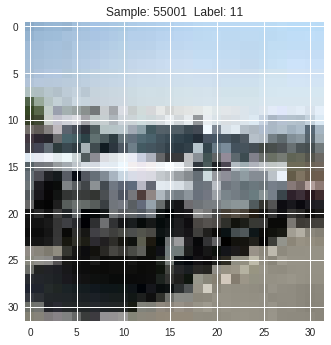

In [39]:
import matplotlib.pyplot as plt

def display_sample(num):
    print(y_train[num])  
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([32,32,3])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(55001)

In [42]:
#Step 3: Build a CNN network to classify an image across 13 classes . You can refer to the following link:
from keras.models import Sequential
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Lambda, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input

# get shapes
N, H, W, C = x_train.shape
#K = len(set(y_train))
          
# make the CNN
i = Input(shape=(H, W, C))
x = Conv2D(filters=32, kernel_size=(3, 3))(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=64, kernel_size=(3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Conv2D(filters=128, kernel_size=(3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(units=300)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=13)(x)
x = Activation('softmax')(x)

model = Model(inputs=i, outputs=x)

model.summary()

optimizer = SGD(lr = 0.01, momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

# gives us back a <keras.callbacks.History object at 0x112e61a90>
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=32)
print("Returned:", history)

# print the available keys
# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])
print(history.history.keys())

# plot some data
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 13, 13, 64)        256       
__________

Test loss: 0.5600433067302893
Test accuracy: 0.8075686371506308
